# **Twitter Sentiment Analysis**

In this project, a two category sentiment analysis was conducted on real tweets using Naive-Bayes and logistic regression classifiers.

This project can be divided into four main parts

Part 1: Importing libraries and exploring the data

Part 2: Data preprocessing and handling imbalanced data, Vectorization

Part 3: Training the Data

Part 4: Assessing performance of the models

# **Part 1: Importing libraries and exploring the data**
- Importing libraries
- Get info and basic statistical characteristics of the data
- Check if there is null values
- Check if the data is balanced
- Check the length of the messages
- get WordCloud of the data

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('twitter.csv')

In [4]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
# Get more information about the data, is there null value, type of the values, etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# Get basic statistical charactristics of data
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [3]:
# Removing the 'id' column since there is no need for that
df = df.drop('id', axis = 1)

In [8]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


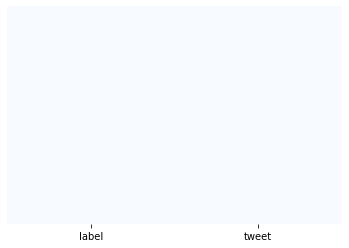

In [9]:
# Check if there is any null elements 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd415ad4a8>]],
      dtype=object)

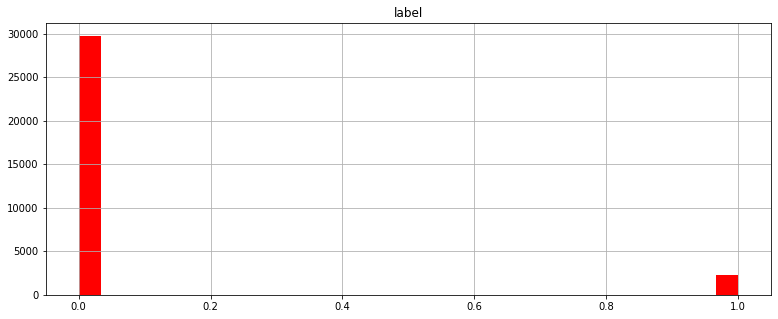

In [10]:
# Plot histogram of the label
df.hist(bins = 30, figsize = (13,5), color = 'r')

From the above graph we can clearly see that the data is unbalanced. There are near 30000 positive message vs 2500 negative message

In [11]:
# Get the length of the messages and add it to dataframe
df['length'] = df['tweet'].apply(len)

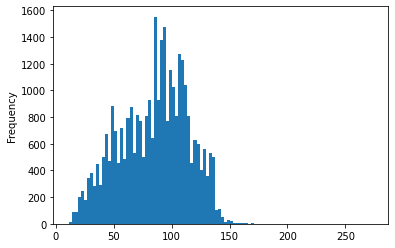

In [12]:
# Get the histogram of the length
df['length'].plot(bins=100, kind='hist') 

In [13]:
df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [14]:
positive = df[df['label']==0]
negative = df[df['label']==1]

In [15]:
# Making a MASSIVE string out of data
sentences = df['tweet'].tolist()

In [17]:
sentences_as_one_string = " ".join(sentences)

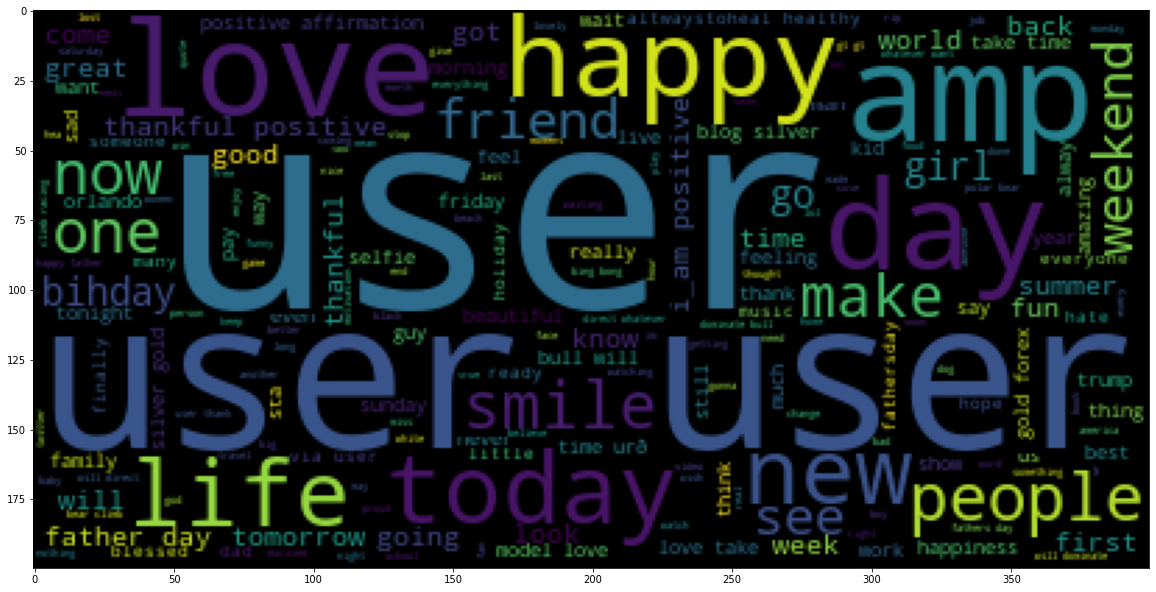

In [18]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# **Part 2: Cleaning data and handling imbalance data**
- Remove punctuations
- remove stop words
- vectorization
- handle imbalanced data

In [3]:
import string
string.punctuation
# We want to remove these characters

import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean (message):
  '''
  A  pipeline that removes punctuation and stopwords
  '''
  import string
  string.punctuation
  # We want to remove these characters

  punc_removed = [char for char in message if char not in string.punctuation]
  # Join the characters again to form the string.
  punc_removed_join = ''.join(punc_removed)
  punc_removed_join

  

  stopw_removed =[ word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]

  return stopw_removed


In [22]:
# Test the clean function
df_clean = df['tweet'].apply(clean)

In [23]:
df_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

In [24]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Use the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = clean)
tweets_countvectorizer = CountVectorizer(analyzer = clean, dtype = 'uint8').fit_transform(df['tweet'])

In [7]:
print(tweets_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
tweets_countvectorizer.shape

(31962, 47386)

In [7]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [8]:
y = df['label']

In [9]:
# Shape of features
X.shape

(31962, 47386)

In [10]:
# Shape of target
y.shape

(31962,)

In [18]:
# In order to handle imbalance data we use under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# Shape of resampled feature
X_resampled.shape

(4484, 47386)

In [20]:
# Shape of resampled target
y_resampled.shape

(4484,)

# **Part 3: Train the models**
- Train Naive Bayes classifier
- Train Logistic regression classifier

In [21]:
# Create train and test datasets from resampled data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [30]:
# Train Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# Train Logistic regression classifier
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)

# **Part 3: Assess the models**

- Confusion matrix
- precision, recall, f1-score

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

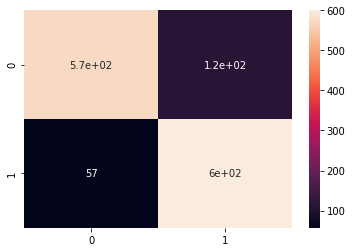

In [25]:
# Predicting the Test set results for Naive Bayes
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [26]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       689
           1       0.84      0.91      0.87       657

    accuracy                           0.87      1346
   macro avg       0.87      0.87      0.87      1346
weighted avg       0.88      0.87      0.87      1346



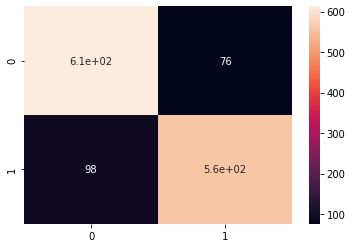

In [28]:
# Predicting the Test set results for Naive Bayes
y_predict_test = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       689
           1       0.88      0.85      0.87       657

    accuracy                           0.87      1346
   macro avg       0.87      0.87      0.87      1346
weighted avg       0.87      0.87      0.87      1346

